## 1. Introduction

Diabetes is a major public health concern associated with increased morbidity, mortality, and healthcare costs. Understanding demographic and behavioral factors associated with the widespread of diabetes can help inform prevention strategies and public health interventions.

This project explores relationships between diabetes diagnosis and selected risk factors using public health survey data. The analysis focuses on exploratory data analysis and statistical inference rather than predictive modeling.

### Research Questions
The primary questions addressed in this analysis are:

1. Is body mass index (BMI) significantly associated with diabetes prevalence?
2. Do physically active individuals exhibit lower rates of diabetes compared to inactive individuals?
3. Does diabetes prevalence differ significantly across age groups?
4. Is income level associated with diabetes diagnosis?

## 2. Data Overview

The dataset used in this project is derived from a public health behavioral survey and includes individual-level responses related to diabetes diagnosis, demographic characteristics, and health-related behaviors.

"Diabetes Health Indicators Dataset" - https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [1]:
import pandas as pd

df = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")

print("Shape:", df.shape)
display(df.head())

display(df.dtypes)

# missing values check
display(df.isna().sum().sort_values(ascending=False).head(20))


Shape: (253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

### 2a. Target Variable Definition

The primary outcome variable in this analysis is **Diabetes_012**, which represents diabetes status based on self-reported survey responses.

The variable is encoded as follows:
- **0**: No diabetes
- **1**: Prediabetes
- **2**: Diabetes

For the purposes of this exploratory and statistical analysis, diabetes status will be examined both in its original categorical form and, where appropriate, using binary groupings to support hypothesis testing.

### 2b. Key Variables and Descriptions

The following variables are central to the analyses:

- **BMI**: Body Mass Index, calculated from self-reported height and weight.
- **PhysActivity**: Indicator of whether the respondent engaged in physical activity during the past 30 days.
- **Age**: Categorical age group variable.
- **HighBP**: Indicator for high blood pressure diagnosis.
- **HighChol**: Indicator for high cholesterol diagnosis.
- **Smoker**: Indicator for current or former smoking status.
- **Income**: Ordinal variable representing household income category.
- **Education**: Ordinal variable representing highest level of education attained.

All variables are derived from self-reported survey data

In [ ]:
# target variable distribution
df["Diabetes_012"].value_counts().sort_index()

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64

In [ ]:
# target variable proportions
df["Diabetes_012"].value_counts(normalize=True).sort_index()

Diabetes_012
0.0    0.842412
1.0    0.018255
2.0    0.139333
Name: proportion, dtype: float64

The dataset is imbalanced.

Prediabetes is rare.

For hypothesis testing, we will combine prediabetes and diabetes into a single "diabetes-related" group.

## 3. Data Cleaning & Preparation

In [11]:
# recode diabetes outcome into binary indicator (0 = no diabetes, 1 = prediabetes/diabetes)
df["Diabetes_binary"] = (df["Diabetes_012"] >= 1).astype(int)

df["Diabetes_binary"].value_counts(normalize=True)

Diabetes_binary
0    0.842412
1    0.157588
Name: proportion, dtype: float64

In [12]:
# summary statistics for BMI
df["BMI"].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [13]:
# check extreme BMI values
df["BMI"].sort_values().head()
df["BMI"].sort_values(ascending=False).head()


76532    98.0
79554    98.0
79507    98.0
79478    98.0
76394    98.0
Name: BMI, dtype: float64

BMI is right-skewed.

Extreme values exist but are clinically possible.

Do not assume normality.

A non-parametric test may be appropriate.

Given the skewed distribution of BMI and the presence of extreme values, a Mann–Whitney U test seems ideal to compare BMI distributions between groups, as it does not assume normality and is robust to outliers.

## 4. Exploratory Data Analysis

### 4a. Hypothesis Testing: BMI and Diabetes Status

This analysis examines whether body mass index (BMI) differs between individuals with and without diabetes-related conditions.

**Null Hypothesis:**  
There is no difference in BMI distributions between individuals with and without diabetes.

**Alternative Hypothesis:**  
BMI distributions differ between individuals with and without diabetes.


In [15]:
bmi_no_diabetes = df.loc[df["Diabetes_binary"] == 0, "BMI"]
bmi_diabetes = df.loc[df["Diabetes_binary"] == 1, "BMI"]

bmi_no_diabetes.describe()

count    213703.000000
mean         27.742521
std           6.260993
min          12.000000
25%          24.000000
50%          27.000000
75%          30.000000
max          98.000000
Name: BMI, dtype: float64

In [16]:
bmi_diabetes.describe()

count    39977.000000
mean        31.802737
std          7.328665
min         13.000000
25%         27.000000
50%         31.000000
75%         35.000000
max         98.000000
Name: BMI, dtype: float64

In [25]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(
    bmi_no_diabetes,
    bmi_diabetes,
    alternative="two-sided"
)

n1 = len(bmi_no_diabetes)
n2 = len(bmi_diabetes)

rank_biserial = 1 - (2 * u_stat) / (n1 * n2)

In [27]:
print("BMI vs Diabetes Status (Mann-Whitney U Test)")
print("-" * 45)
print(f"U statistic: {u_stat:,.1f}")
print(f"p-value: {p_value:.2e}")
print(f"Rank-biserial correlation: {rank_biserial:.3f}")

BMI vs Diabetes Status (Mann-Whitney U Test)
---------------------------------------------
U statistic: 2,683,141,047.5
p-value: 0.00e+00
Rank-biserial correlation: 0.372


The Mann–Whitney U test indicates a statistically significant difference in BMI distributions between individuals with and without diabetes-related conditions (p < 0.001). While the large sample size leads to extremely small p-values, the rank-biserial correlation of approximately 0.37 suggests a moderate and practically meaningful difference, with individuals in the diabetes group tending to have higher BMI values.

### BMI Distribution by Diabetes Status


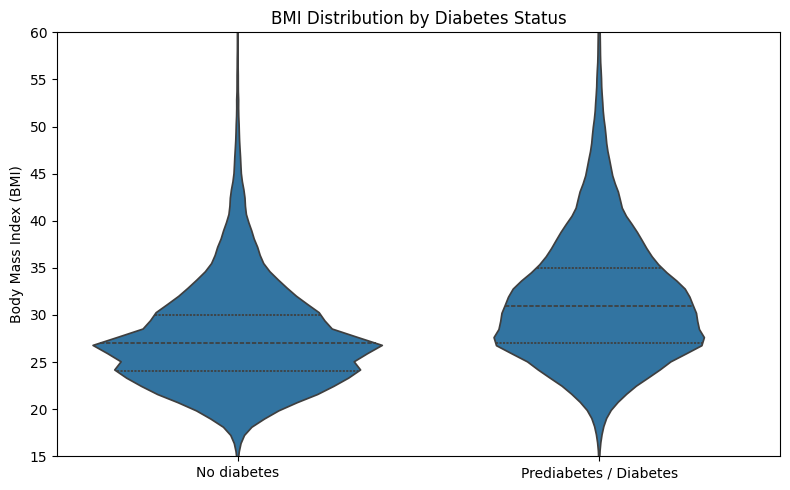

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.violinplot(
    data=df,
    x="Diabetes_binary",
    y="BMI",
    inner="quartile",
    cut=0
)

plt.xticks(
    ticks=[0, 1],
    labels=["No diabetes", "Prediabetes / Diabetes"]
)

plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("")
plt.ylabel("Body Mass Index (BMI)")
plt.ylim(15, 60)

plt.tight_layout()
plt.show()

The violin plot illustrates the distribution of BMI across diabetes status groups. Individuals with prediabetes or diabetes exhibit a higher median BMI and a generally upward-shifted distribution compared to individuals without diabetes. While the distributions overlap, the shift in central tendency and spread visually supports the results of the Mann–Whitney U test and the observed moderate effect size.


### Conclusion

There is strong evidence of an association between BMI and diabetes status in this dataset. Individuals with prediabetes or diabetes tend to have higher BMI values compared to individuals without diabetes. While the large sample size contributes to strong statistical significance, the moderate effect size indicates that the difference is also practically meaningful.


## 5. Statistical Analysis

## 6. Key Insights

## 7. Limitations & Next Steps